In [4]:
import networkx as nx
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [5]:
sizes = [30,32,41,39]

probs = [[.5 if x == y else .05 for x in range(len(sizes))] for y in range(len(sizes))]
ER = nx.gnp_random_graph(100, .025)
ER = ER.subgraph(max(nx.connected_components(ER)))
SBM = nx.stochastic_block_model(sizes, probs)
K = nx.karate_club_graph()


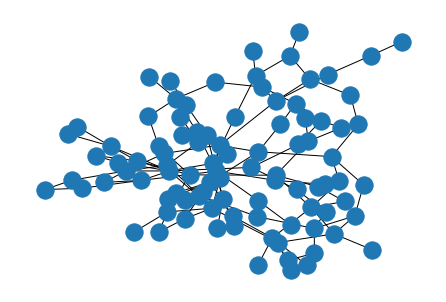

In [6]:
nx.draw(ER)

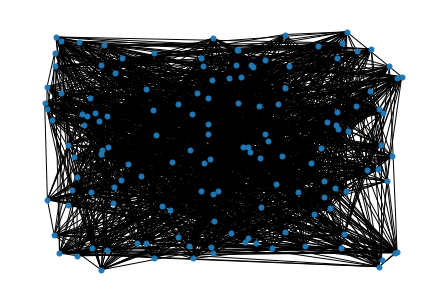

In [7]:
pos={node:(random.random(),random.random()) for node in SBM.nodes()}
nx.draw(SBM,pos=pos,node_size=25,width=1)

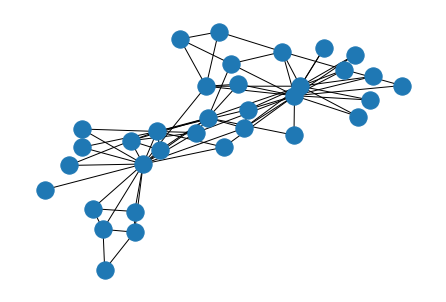

In [8]:
nx.draw(K)

In [9]:
LMERva, LMERve = LA.eigh(nx.normalized_laplacian_matrix(ER).todense())
LMSBMva, LMSBMve = LA.eigh(nx.normalized_laplacian_matrix(SBM).todense())
LMKva, LMKve = LA.eigh(nx.normalized_laplacian_matrix(K).todense())




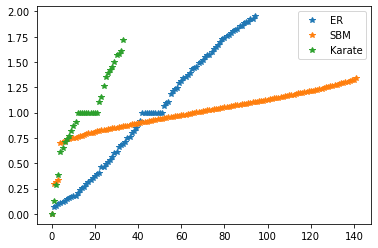

In [10]:
plt.plot(LMERva,'*',label='ER')
plt.plot(LMSBMva,'*',label='SBM')
plt.plot(LMKva,'*',label='Karate')
plt.legend()


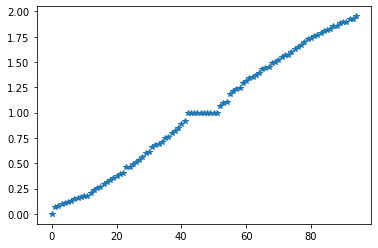

In [11]:
plt.plot(LMERva,'*',label='ER')


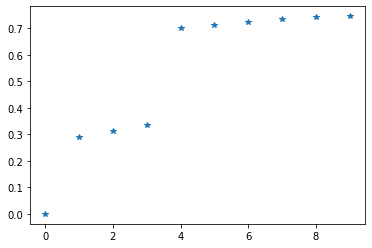

In [12]:
plt.plot(LMSBMva[0:10],'*',label='SBM')


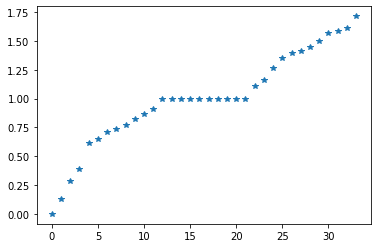

In [13]:
plt.plot(LMKva,'*',label='Karate')


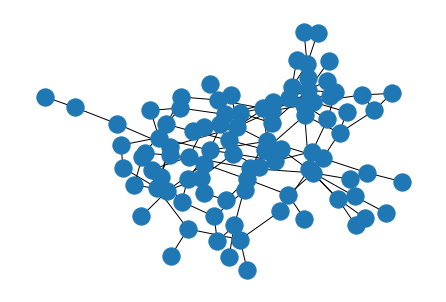

In [14]:
nx.draw(ER)


In [15]:
k=2

X = LMERve[:,0:k]


kmeans = KMeans(n_clusters=k, random_state=0).fit(X)


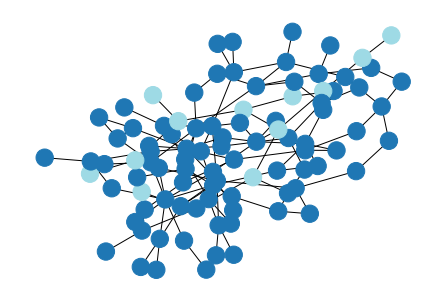

In [16]:
nx.draw(ER, node_color = kmeans.labels_, cmap = 'tab20')

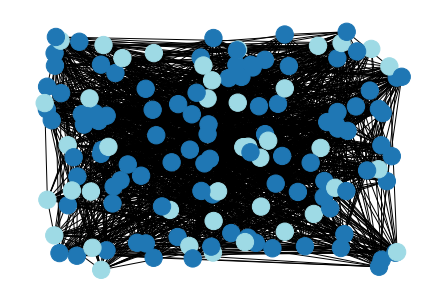

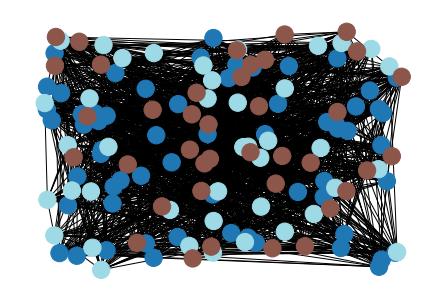

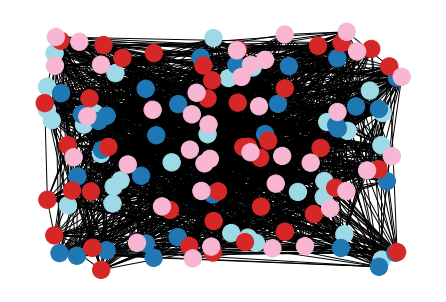

In [17]:
k=4
for i in range(2,k+1):
    X = LMSBMve[:,0:i]


    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    plt.figure()
    nx.draw(SBM,pos=pos, node_color = kmeans.labels_, cmap = 'tab20')
    plt.show()

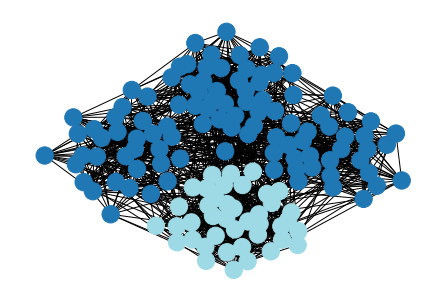

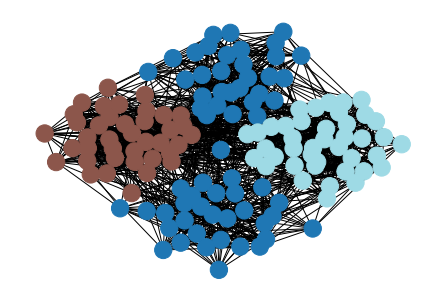

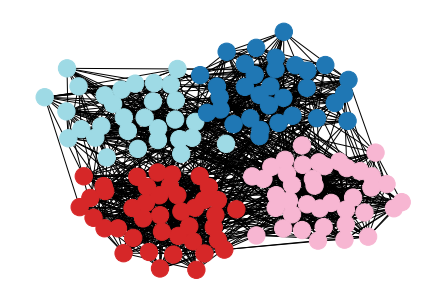

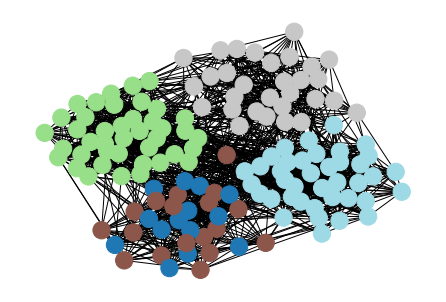

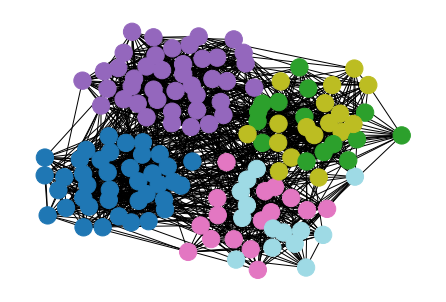

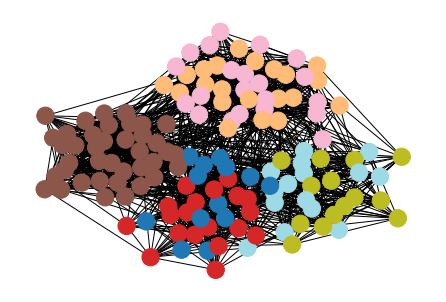

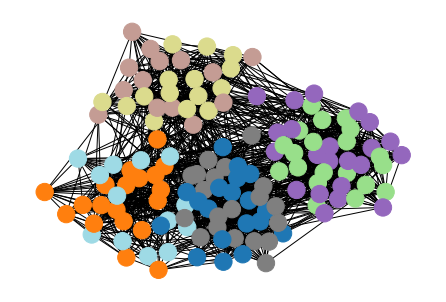

In [18]:
k=8
for i in range(2,k+1):
    X = LMSBMve[:,0:i]


    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    plt.figure()
    nx.draw(SBM, node_color = kmeans.labels_, cmap = 'tab20')
    plt.show()


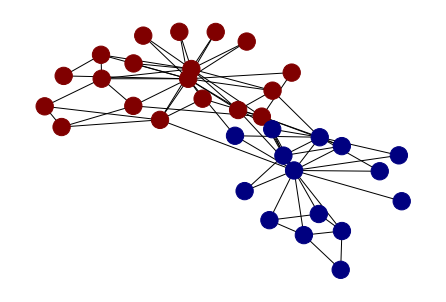

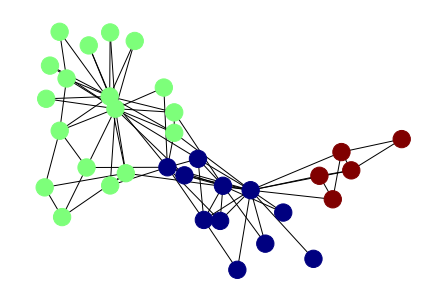

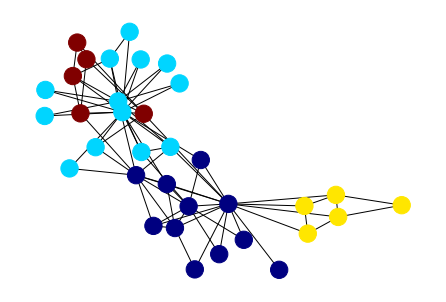

In [19]:
k=4
for i in range(2,k+1):
    X = LMKve[:,0:i]
    kmeans = KMeans(n_clusters=i).fit(X)
    plt.figure()
    nx.draw(K, node_color = kmeans.labels_, cmap = 'jet')
    plt.show()